## Add Libraries

In [44]:
# Using .api to import public access version of statsmodels, a library that handles statistical models
# Using last library to handle warnings

import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings 

In [45]:
# Disabling deprecation warnings that could indicate, for instance, a suspended library or feature; not task-relevant

warnings.filterwarnings("ignore") 

# Choosing styling option for how plots will appear

plt.style.use('fivethirtyeight')

### Import Data

In [46]:
#Creating Path
path = r'/Users/gwynreniers/Documents/Exercise 6.6'
path

'/Users/gwynreniers/Documents/Exercise 6.6'

In [47]:
df = pd.read_csv(os.path.join(path,'World Happiness Report Continents.csv'),
                      index_col = False)

In [48]:
df.shape

(52, 14)

In [49]:
# Checking headers
pd.options.display.max_columns = None
df.head()

,Unnamed: 0.1,Unnamed: 0,Year,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Total_views,Continent
0,15,15,2015,Brazil,16,6.983,0.98124,1.23287,0.69702,0.49049,0.17521,0.14574,111,South America
1,22,22,2015,Venezuela,23,6.810,1.04424,1.25596,0.72052,0.42908,0.11069,0.05841,353,South America
2,26,26,2015,Chile,27,6.670,1.10715,1.12447,0.85857,0.44132,0.12869,0.33363,121,South America
3,29,29,2015,Argentina,30,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,138,South America
4,31,31,2015,Uruguay,32,6.485,1.06166,1.20890,0.81160,0.60362,0.24558,0.23240,151,South America


In [40]:
data_2.shape

(52, 11)

In [51]:
# Creating a new dataframe with median happiness score grouped by years
data = df.groupby('Year').agg({'Happiness Score': ['median']})

In [52]:
data

,Happiness Score
,median
Year,
2015,6.4770
2016,6.2690
2017,6.1825
2018,6.1165
2019,6.1165


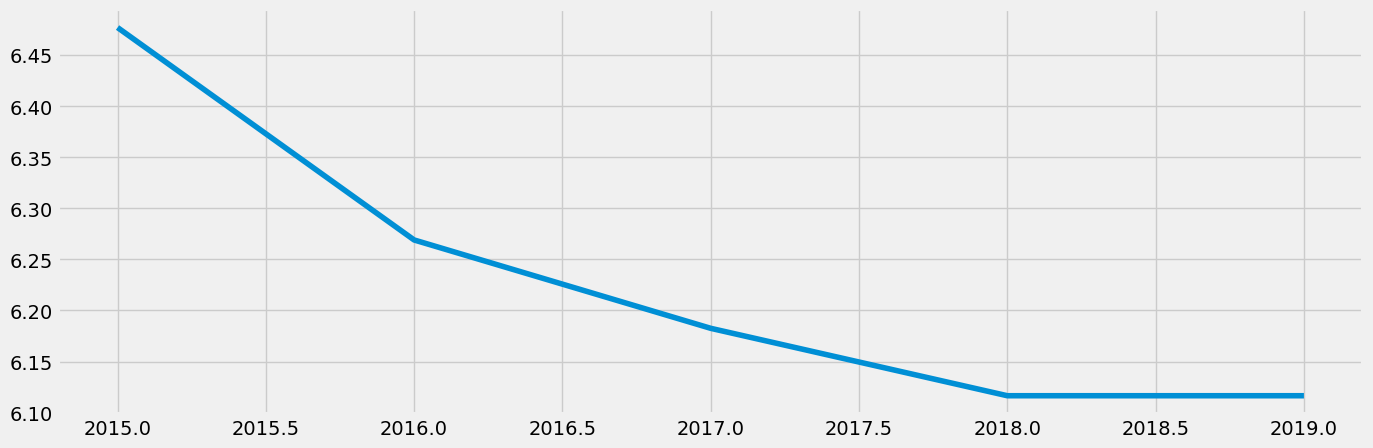

In [53]:
# Plotting the data using matplotlib
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data)

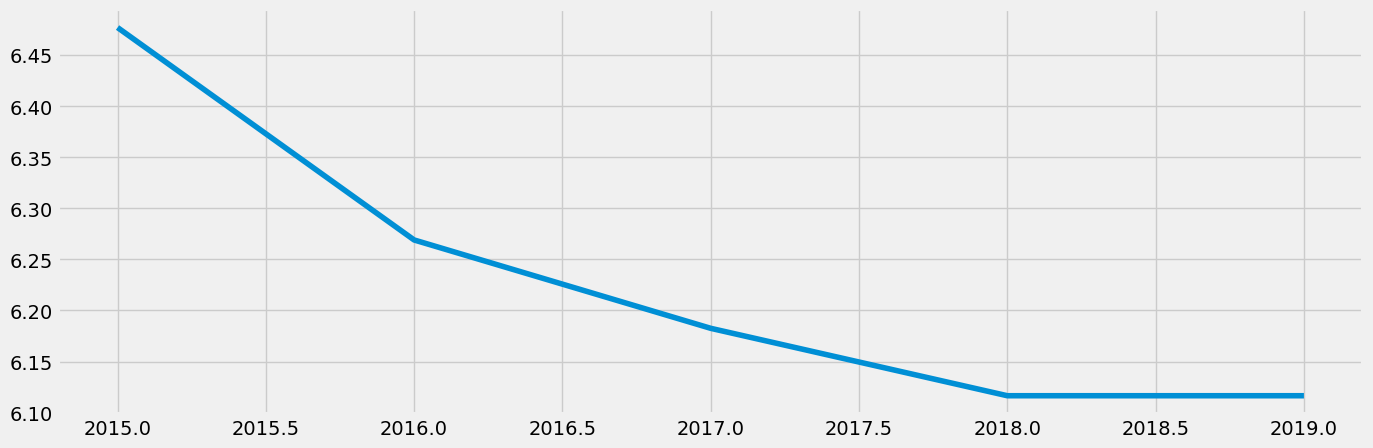

In [54]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data)

In [57]:
data_sub = data_2.loc[(data_2['Year'] >= '2015') & (data_2['Year'] < '2019')]

### Decomposing Time-Series Data

In [63]:
# Decomposing time series using 
decomp = sm.tsa.seasonal_decompose(data_sub, model='additive')

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [61]:
# The adfuller() function imports from the model from statsmodels; but running it will only return an array of numbers
# This is the reason to define a function that prints the correct output from that array

# Importing the adfuller() function

from statsmodels.tsa.stattools import adfuller 

# Performing the Dickey-Fuller test:

def dickey_fuller(timeseries): # Define the function
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data['Happiness Score'])

Dickey-Fuller Stationarity test:
Test Statistic                -9.034281e+00
p-value                        5.341211e-15
Number of Lags Used            0.000000e+00
Number of Observations Used    4.000000e+00
Critical Value (1%)           -7.355441e+00
Critical Value (5%)           -4.474365e+00
Critical Value (10%)          -3.126933e+00
dtype: float64


In [67]:
data_diff = data_sub - data_sub.shift(1)

In [68]:
data_diff.dropna(inplace = True)

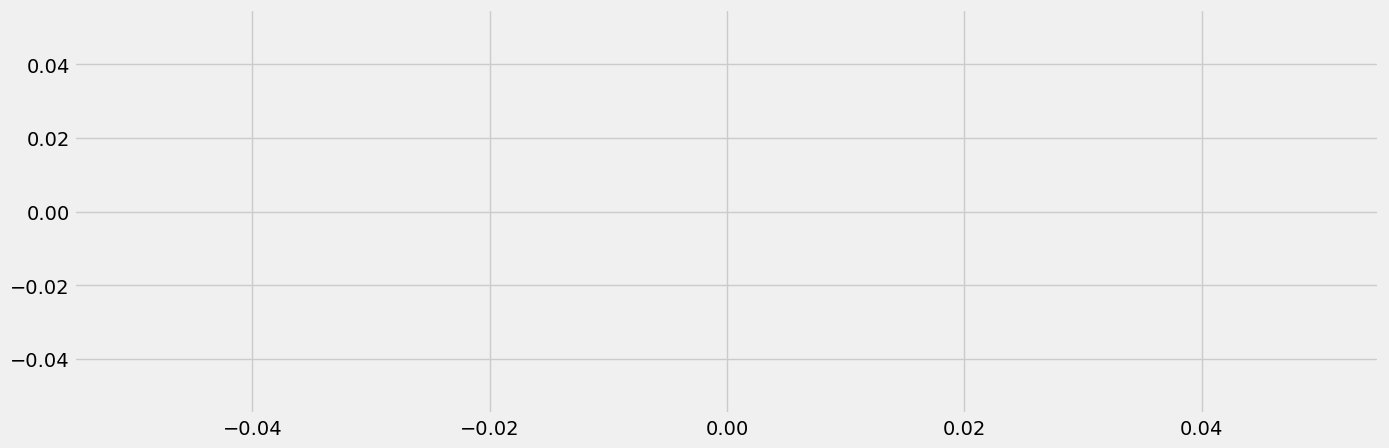

In [69]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)